In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import pickle

In [56]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

## Loading Dataset

In [57]:
df = pd.read_csv('Dataset/boston_housing.csv',names = column_names,header=None, delimiter=r"\s+")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [58]:
x = df.drop(columns = ['MEDV'])
y = df['MEDV']

In [59]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Train_Test Split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [61]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80


## Standardization

In [62]:
scaler = StandardScaler()

In [63]:
x_train = scaler.fit_transform(x_train)

In [64]:
x_test = scaler.transform(x_test)

## Model Building

In [65]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Cross-validation

In [66]:
# Cross validation
mse = cross_val_score(model,x_train,y_train,cv = 10,scoring = "neg_mean_squared_error")

In [67]:
mse

array([-16.05714957, -20.77819294, -26.84748288, -17.53252679,
       -26.63210563, -12.64348841, -56.70919053, -17.46099337,
       -21.81979244, -11.78951542])

In [68]:
np.mean(mse)

-22.82704379781441

## Prediciton

In [69]:
y_predicted = model.predict(x_test)

In [70]:
y_predicted

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [71]:
print(type(y_test))
print(type(y_predicted))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


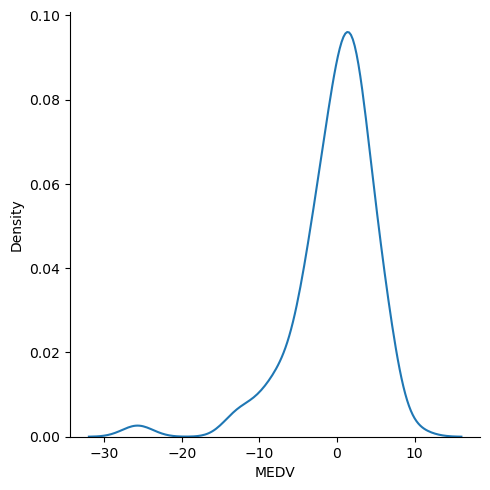

In [72]:
sns.displot(y_predicted - y_test,kind = "kde")
# It will the variance of the difference between y_predicted and y_test.

## r2_score (Accuracy)

In [73]:
y_test = np.array(y_test)
y_predicted = np.array(y_predicted)

In [74]:
score = r2_score(y_test,y_predicted)

In [75]:
score

0.6733825506400195

## Ridge Regularization

In [76]:
ridge_model = Ridge()

In [77]:
parameters = {"alpha" : [1,2,5,10,20,30,40,50,60,70,80,90]}

In [78]:
ridge_cv = GridSearchCV(ridge_model,parameters,scoring = 'neg_mean_squared_error',cv = 10)
ridge_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [79]:
print(ridge_cv.best_params_)

{'alpha': 5}


In [80]:
print(ridge_cv.best_score_)

-22.773324519321335


In [81]:
ridge_predicted = ridge_cv.predict(x_test)

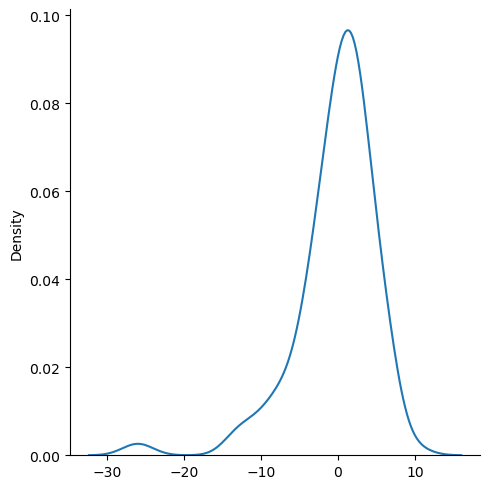

In [82]:
sns.displot(ridge_predicted - y_test,kind = 'kde')

In [83]:
ridge_score = r2_score(y_test,ridge_predicted)

In [84]:
ridge_score

0.6703585664250096

## Lasso Regularization

In [85]:
lasso_model = Lasso()

In [86]:
parameters = {"alpha" : [1,2,5,10,20,30,40,50,60,70,80,90]}

In [87]:
lasso_cv = GridSearchCV(lasso_model,parameters,scoring = 'neg_mean_squared_error',cv = 10)
lasso_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [88]:
print(lasso_cv.best_params_)

{'alpha': 1}


In [89]:
print(lasso_cv.best_score_)

-27.85465233005153


In [90]:
lasso_predicted = lasso_cv.predict(x_test)

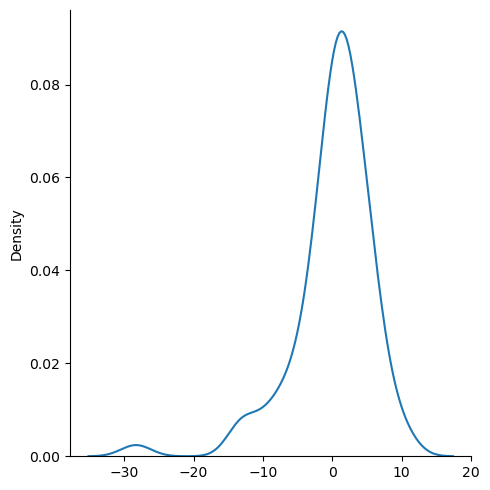

In [91]:
sns.displot(lasso_predicted - y_test, kind = 'kde')

In [92]:
lasso_score = r2_score(y_test,lasso_predicted)

In [93]:
lasso_score

0.5999442961470397

## Saving model

In [94]:
model_filename = "model.pkl"

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {model_filename}")

Model saved as model.pkl


## Saving scaler

In [95]:
scaler_name = "scaler.pkl"

with open(scaler_name,"wb") as file:
    pickle.dump(scaler,file)

print(f"Scaler saved as {scaler_name}")

Scaler saved as scaler.pkl
